# Recommendation System Exercise 1 - Trial


Import Packages

In [26]:
# For lecture
%run liblecture.py

In [27]:
# import pandas packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import other packages
import datetime
import random
import math

In [28]:
df = pd.read_csv('ratings.csv')

In [30]:
df['month'] = df['timestamp'].map(lambda x: datetime.datetime.fromtimestamp(x).month)

In [35]:
monthCounts = df['month'].value_counts(sort=False)

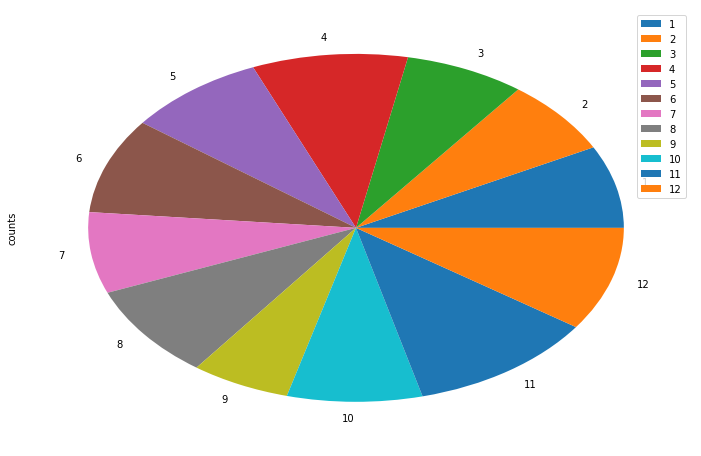

In [38]:
# pie chart 그리기
monthCounts.plot(kind='pie', figsize=(12,8), label='counts', legend=True)
plt.show()

In [46]:
train = df.sample(frac=0.8, random_state=10)

In [48]:
# 트레이닝, 테스트셋 8:2로 나누기, random_state = 10
train.head()

,userId,movieId,rating,timestamp,month
10810,73,3681,4.5,1470896634,8
7713,48,69712,3.5,1319748155,10
54607,390,818,2.0,867073940,6
22357,157,1391,2.5,1291665492,12
72256,508,316,4.0,844375956,10


In [49]:
test = df.drop(train.index)

In [50]:
test.head()

,userId,movieId,rating,timestamp,month
2,1,1061,3.0,1260759182,12
10,1,1371,2.5,1260759135,12
19,1,3671,3.0,1260759117,12
21,2,17,5.0,835355681,6
24,2,50,4.0,835355586,6


In [51]:
print(train.shape)
print(test.shape)

#1:
(80003, 5)


#2:
(20001, 5)




Compute average rating of all users and assign it to the all predicted ratings.

In [54]:
# 트레이닝셋 rating 컬럼의 (최댓값 - 최솟값) 구하기
value = train['rating'].max() - train['rating'].min()
value

4.5

In [57]:
avgRating = train['rating'].mean()
avgRating

3.5436483631863807

In [61]:
# (최댓값 - 최솟값)을 예측값으로 사용하기
avgPred = test[['userId', 'movieId', 'rating']].copy()
avgPred['pred'] = avgRating
avgPred.head()

,userId,movieId,rating,pred
2,1,1061,3.0,3.54
10,1,1371,2.5,3.54
19,1,3671,3.0,3.54
21,2,17,5.0,3.54
24,2,50,4.0,3.54


In [66]:
avgPredErrors = avgPred['pred'] - avgPred['rating']
mae1 = avgPredErrors.abs().mean()
rmse1 = math.sqrt(avgPredErrors.abs().pow(2).mean())
print(" MAE1:", mae1)
print("RMSE1:", rmse1)

#4:
 MAE1: 0.8487423778255602


#5:
RMSE1: 1.0592125072666392




In [124]:
userRatings = train[['userId','rating']].groupby('userId').agg(['max', 'min'])

In [125]:
# 각 사용자별 최댓값, 최솟값 구하기
userRatings.head()

rating     
          max  min
userId            
1         4.0  1.0
2         5.0  1.0
3         5.0  2.0
4         5.0  1.0
5         5.0  1.5

In [126]:
userRatings['pred'] = userRatings['rating']['max']-userRatings['rating']['min']

In [131]:
df = pd.DataFrame(userRatings['pred'])

In [132]:
df['userId'] = userRatings.index

In [134]:
#(최댓값-최솟값)을 예측값으로 사용하기
df.head()

,pred,userId
userId,,
1,3.0,1
2,4.0,2
3,3.0,3
4,4.0,4
5,3.5,5


In [135]:
userPred = test[['userId', 'movieId', 'rating']]

In [136]:
userPred = pd.merge(userPred, df, how='left', on=['userId'])

In [140]:
# 사용자별 예측치가 함께 있는 데이터 생성
userPred.head(n=10)

,userId,movieId,rating,pred
0,1,1061,3.0,3.0
1,1,1371,2.5,3.0
2,1,3671,3.0,3.0
3,2,17,5.0,4.0
4,2,50,4.0,4.0
5,2,222,5.0,4.0
6,2,300,3.0,4.0
7,2,485,3.0,4.0
8,2,500,4.0,4.0
9,2,539,3.0,4.0


In [141]:
predError = userPred['rating']-userPred['pred']

In [147]:
mae2 = predError.abs().mean()

In [148]:
rmse2 = math.sqrt(predError.abs().pow(2).mean())

In [150]:
# MAE, RMSE 구하기
print(" MAE2:", mae2)
print("RMSE2:", rmse2)

#2:
 MAE2: 1.060621968901555


#3:
RMSE2: 1.4013259129425553


